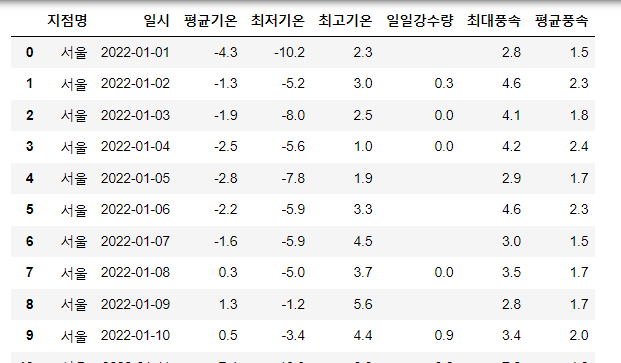

In [44]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import json

In [98]:

인증키="Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D"
시작일=20200101
종료일=20200601
지점코드=108
url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey="
url = url + 인증키
url = url + "&pageNo=1&dataCd=ASOS&dateCd=DAY&dataType=XML"
url = url + "&numOfRows=999"
url = url + "&startDt=" + str(시작일) + "&endDt=" + str(종료일)
url = url + "&stnIds=" + str(지점코드)

xml=requests.get(url)
soup=bs(xml.text,'html.parser')




items=soup.find_all('item')
dts={
    'stnnm':'지점명',
    'tm':'일시',
    'avgta':'평균기온',
    'minta':'최저기온',
    'maxta':'최고기온',
    'sumrn':'일일강수량',
    'maxws':'최대풍속',
    'avgws':'평균풍속'
  }
res=[]
for item in items:

    tmp={}
    for k,dt in dts.items():
        tmp[dt]=item.find(k).text
    res.append(tmp)
df=pd.DataFrame(res)
display(df)



C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,지점명,일시,평균기온,최저기온,최고기온,일일강수량,최대풍속,평균풍속
0,서울,2020-01-01,-2.2,-6.5,0.3,0.1,2.6,0.6
1,서울,2020-01-02,1.0,-0.7,3.8,,4.0,1.2
2,서울,2020-01-03,-0.1,-3.4,4.6,,3.5,1.7
3,서울,2020-01-04,1.2,-2.8,6.1,,4.5,1.9
4,서울,2020-01-05,1.3,-3.2,6.6,,2.9,1.1
...,...,...,...,...,...,...,...,...
148,서울,2020-05-28,18.7,14.2,23.4,0.0,3.9,1.9
149,서울,2020-05-29,20.7,14.6,27.6,,4.1,2.0
150,서울,2020-05-30,22.6,16.5,30.0,,4.3,1.9
151,서울,2020-05-31,21.2,17.6,28.0,1.0,5.7,2.3


In [96]:
인증키="Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D"
시작일=20200101
종료일=20200601
지점코드=108
url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey="
url = url + 인증키
url = url + "&pageNo=1&dataCd=ASOS&dateCd=DAY&dataType=JSON"
url = url + "&numOfRows=999"
url = url + "&startDt=" + str(시작일) + "&endDt=" + str(종료일)
url = url + "&stnIds=" + str(지점코드)

response=requests.get(url)


json_obj=json.loads(response.text)

items=json_obj['response']['body']['items']['item']

df=pd.DataFrame(items)

df1=df[['stnNm', 'tm', 'avgTa', 'minTa', 'maxTa', 'sumRn', 'maxWs', 'avgWs']]
df1

,stnNm,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs
0,서울,2020-01-01,-2.2,-6.5,0.3,0.1,2.6,0.6
1,서울,2020-01-02,1.0,-0.7,3.8,,4.0,1.2
2,서울,2020-01-03,-0.1,-3.4,4.6,,3.5,1.7
3,서울,2020-01-04,1.2,-2.8,6.1,,4.5,1.9
4,서울,2020-01-05,1.3,-3.2,6.6,,2.9,1.1
...,...,...,...,...,...,...,...,...
148,서울,2020-05-28,18.7,14.2,23.4,0.0,3.9,1.9
149,서울,2020-05-29,20.7,14.6,27.6,,4.1,2.0
150,서울,2020-05-30,22.6,16.5,30.0,,4.3,1.9
151,서울,2020-05-31,21.2,17.6,28.0,1.0,5.7,2.3
